In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [6]:
mypath = "C:/Users/batuh/Desktop/FER/train/angry/Training_3908.jpg"
img_array = cv2.imread(mypath)

In [7]:
img_array.shape

(48, 48, 3)

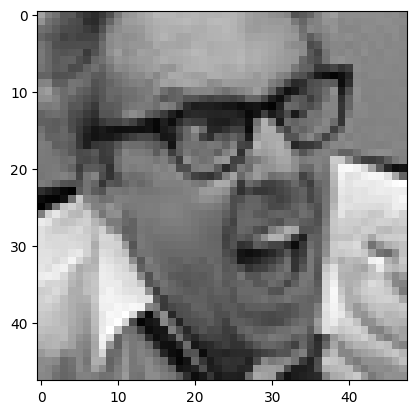

In [8]:
plt.imshow(img_array)

In [9]:
DATADIR = "C:/Users/batuh/Desktop/FER/train/"

In [10]:
MOODS = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

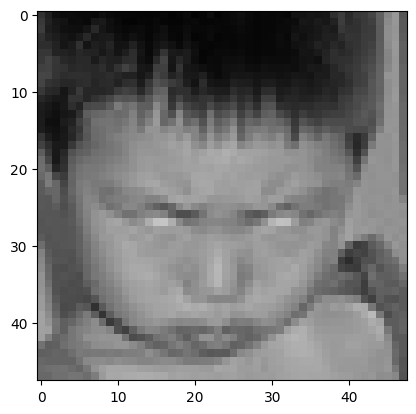

In [14]:
for category in MOODS:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break    

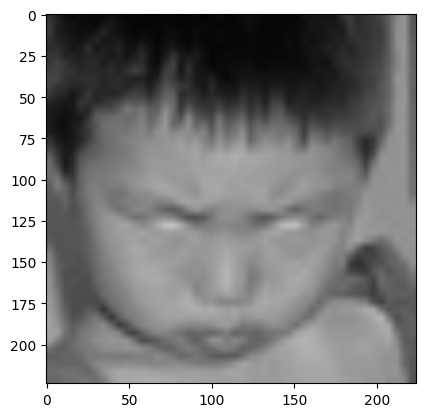

In [15]:
IMG_SIZE = 224
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
new_array.shape

(224, 224, 3)

In [18]:
training_data = []

def create_training_data():
    for category in MOODS:
        path = os.path.join(DATADIR, category)
        class_num = MOODS.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()            

In [19]:
print(len(training_data))

28709


In [20]:
import random

random.shuffle(training_data)

for sample in training_data[:25]:
    print(sample[1])

5
0
3
2
4
0
3
6
4
5
6
5
3
4
0
0
6
0
3
4
0
2
3
2
3


In [22]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)    